# Gradient Descent

### Learning Objectives 

* Understand how to go from RSS to finding a "best fit" line
* Understand a cost curve and what it displays

### Introduction

In the previous section we saw how after choosing the slope and y-intercept values of a regression line, we can calculate the residual sum of squares (RSS) and related root mean squared error.  We can use either the RSS or RMSE to calculate the accuracy of a line.  In this lesson we'll proceed with RSS as it's the simpler of the two.

Once calculating the accuracy of a line, we are pretty close to improving upon a line by minimizing the RSS.  This is the task of the gradient descent technique.  But before learning about gradient descent, let's review and ensure that we understand how to evaluate how our line fits our data.  

### Review of plotting our data and a regression line

For this example, let's imagine that our data looks like the following:

In [1]:
first_movie = {'budget': 100, 'revenue': 275}
second_movie = {'budget': 200, 'revenue': 300}
third_movie = {'budget': 250, 'revenue': 550}
fourth_movie = {'budget': 325, 'revenue': 525}
fifth_movie = {'budget': 400, 'revenue': 700}

shows = [first_movie, second_movie, third_movie, fourth_movie, fifth_movie]

Let's again come up with some numbers for a slope and a y-intercept.  

>Remember that our technique so far is to get at the slope by drawing a line between the first and last points.  And from there, we calculate the value of $b$.  Our `build_regression_line` function, defined in our [linear_equations library](https://github.com/learn-co-curriculum/gradient-descent/blob/master/linear_equations.py), quickly does this for us.

So let's convert our data above into a list of `x_values`, budgets, and `y_values`, revenues, and pass them into our `build_regression_line` function. 

In [3]:
# from linear_equations import build_regression_line --> write it again to avoid errors

def expected_value_for_line(m, b, x_value):
    return m*x_value + b

def sorted_points(x_values, y_values):
    values = list(zip(x_values, y_values))
    sorted_values = sorted(values, key=lambda value: value[0])
    return sorted_values

def y_intercept(x_values, y_values, m = None):
    sorted_values = sorted_points(x_values, y_values)
    highest = sorted_values[-1]
    if m == None:
        m = slope(x_values, y_values)
    offset = highest[1] - m*highest[0]
    return offset

def slope(x_values, y_values):
    sorted_values = sorted_points(x_values, y_values)
    x1 = sorted_values[0][0]
    y1 = sorted_values[0][1]
    x2 = sorted_values[-1][0]
    y2 = sorted_values[-1][1]
    m = (y2 - y1)/(x2 - x1)
    return m

def build_regression_line(x_values, y_values):
    sorted_values = sorted_points(x_values, y_values)
    highest = sorted_values[-1]
    lowest = sorted_values[0]
    m = slope(x_values, y_values)
    b = y_intercept(x_values, y_values, m)
    return {'m': m, 'b': b}


budgets = list(map(lambda show: show['budget'], shows))
revenues = list(map(lambda show: show['revenue'], shows))

build_regression_line(budgets, revenues)

{'m': 1.4166666666666667, 'b': 133.33333333333326}

Turning this into a regression formula, we have the following.

In [4]:
def regression_formula(x):
    return 1.417*x + 133.33

Let's plot this regression formula with our data to get a sense of what it looks like. 

In [5]:
# First import the `plotly` libraries and functions in our notebook. 
import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# then import our graph functions --> write it again to avoid errors

def m_b_data(m, b, x_values):
    y_values = list(map(lambda x: m*x + b, x_values))
    return {'x': x_values, 'y': y_values}

def m_b_trace(m, b, x_values, mode = 'lines+markers', name = 'line function'):
    values = m_b_data(m, b, x_values)
    values.update({'mode': mode, 'name': name})
    return values

def trace_values(x_values, y_values, mode = 'markers', name="data", text = []):
    return {'x': x_values, 'y': y_values, 'mode': mode, 'name': name, 'text': text}

def plot(traces, layout = {}):
    if not isinstance(traces, list): raise TypeError('first argument must be a list.  Instead is', traces)
    plotly.offline.iplot({'data': traces, 'layout': layout})
    

regression_trace = m_b_trace(1.417, 133.33, budgets)
scatter_trace = trace_values(budgets, revenues)
plot([regression_trace, scatter_trace])

### Evaluating the regression line

Ok, now we add in our functions for displaying the errors for our graph.

In [6]:
# from graph import trace, plot, line_function_trace --> write it again to avoid errors

def trace(data, mode = 'markers', name="data"):
    x_values = list(map(lambda point: point['x'],data))
    y_values = list(map(lambda point: point['y'],data))
    return {'x': x_values, 'y': y_values, 'mode': mode, 'name': name}
def plot(traces, layout = {}):
    if not isinstance(traces, list): raise TypeError('first argument must be a list.  Instead is', traces)
    plotly.offline.iplot({'data': traces, 'layout': layout})
def line_function_trace(line_function, x_values, mode = 'lines+markers', name = 'line function'):
    values = line_function_data(line_function, x_values)
    values.update({'mode': mode, 'name': name})
    return values

def y_actual(x, x_values, y_values):
    combined_values = list(zip(x_values, y_values))
    point_at_x = list(filter(lambda point: point[0] == x,combined_values))[0]
    return point_at_x[1]

def error_line_trace(x_values, y_values, m, b, x):
    y_hat = m*x + b
    y = y_actual(x, x_values, y_values)
    name = 'error at ' + str(x)
    error_value = y - y_hat
    return {'x': [x, x], 'y': [y, y_hat], 'mode': 'lines+markers', 'marker': {'color': 'red'}, 'name': name, 'text': [error_value], 'textposition':'top right'}

def error_line_traces(x_values, y_values, m, b):
    return list(map(lambda x_value: error_line_trace(x_values, y_values, m, b, x_value), x_values))

errors = error_line_traces(budgets, revenues, 1.417, 133.33)
plot([scatter_trace, regression_trace, *errors])

From there, we calculate the `residual sum of squared errors` and the `root mean squared error`.

In [7]:
import math
def error(x_values, y_values, m, b, x):
    expected = (m*x + b)
    return (y_actual(x, x_values, y_values) - expected)

def squared_error(x_values, y_values, m, b, x):
    return round(error(x_values, y_values, m, b, x)**2, 2)

def squared_errors(x_values, y_values, m, b):
    return list(map(lambda x: squared_error(x_values, y_values, m, b, x), x_values))

def residual_sum_squares(x_values, y_values, m, b):
    return round(sum(squared_errors(x_values, y_values, m, b)), 2)

def root_mean_squared_error(x_values, y_values, m, b):
    return round(math.sqrt(sum(squared_errors(x_values, y_values, m, b)))/len(x_values), 2)

squared_errors(budgets, revenues, 1.417, 133.33)
residual_sum_squares(budgets, revenues, 1.417, 133.33) # 22263.18
root_mean_squared_error(budgets, revenues, 1.417, 133.33) # 29.84

29.84

### Moving towards gradient descent

Now that we have the residual sum of squares function to evaluate the accuracy of our regression line, we can simply try out different regression lines and use the regression line that has the lowest RSS.  The regression line that produces the lowest RSS for a given dataset is called the "best fit" line for that dataset.  

So this will be our technique for finding our "best fit" line:

> * Choose a regression line with a guess of values for $m$ and $b$
> * Calculate the RSS
> * Adjust $m$ and $b$, as these are the only things that can vary in a single-variable regression line.
> * Again calculate the RSS 
> * Repeat this process
> * The regression line (that is, the values of $b$ and $m$) with the smallest RSS is our **best fit line**

We'll eventually tweak and improve upon that process, but for now it will do.  In fact, we will make things even easier at first by holding $m$ fixed to a constant value while we experiment with different $b$ values.  In later lessons, we will change both variables.

#### Updating the regression line to improve accuracy

Ok, so we have a regression line of $\overline{y} = \overline{m}x + \overline{b} $, and we started with values of $m = 1.417 $ and $b = 133.33 $.  Then seeing how well this regression line matched our dataset, we calculated that $ RSS = 22,263.18 $.  Our next step is to plug in different values of $b$ and see how RSS changes.  Let's try $b$ = 140 instead of $133.33$.

In [8]:
residual_sum_squares(budgets, revenues, 1.417, 140)

24130.78

Now let's the RSS for a variety of $b$ values.

In [9]:
def residual_sum_squares_errors(x_values, y_values, regression_lines):
    errors = []
    for regression_line in regression_lines:
        error = residual_sum_squares(x_values, y_values, regression_line[0], regression_line[1])
        errors.append([regression_line[0], regression_line[1], round(error, 0)])
    return errors

In [10]:
b_values = list(range(70, 150, 10))

m_values = [1.417]*8
regression_lines = list(zip(m_values, b_values))
regression_lines

[(1.417, 70),
 (1.417, 80),
 (1.417, 90),
 (1.417, 100),
 (1.417, 110),
 (1.417, 120),
 (1.417, 130),
 (1.417, 140)]

In [11]:
rss_lines = residual_sum_squares_errors(budgets, revenues, regression_lines)
rss_lines

[[1.417, 70, 26696.0],
 [1.417, 80, 23330.0],
 [1.417, 90, 20963.0],
 [1.417, 100, 19597.0],
 [1.417, 110, 19230.0],
 [1.417, 120, 19864.0],
 [1.417, 130, 21497.0],
 [1.417, 140, 24131.0]]

| b        | residual sum of squared           | 
| ------------- |:-------------:| 
| 140| 24131
| 130      |21497| 
| 120      |19864 | 
| 110      |19230| 
|100 | 19597
|90 | 20963
|80 | 23330
|70| 26696

Notice what the above chart represents.  While keeping our value of $m$ fixed at 1.417, we moved towards a smaller residual sum of squares (RSS) by changing our value of $b$, our y-intercept. 

Setting $b$ to 130 produced a lower error than at 140.  We kept moving our $b$ value lower until we set $b$ = 100, at which point our error began to increase.  Therefore, we know that a value of $b$ between 110 and 100 produces the smallest RSS for our data while $m = 1.417 $. 

This changing output of RSS based on a changing input of different regression lines is called our **cost function**.  Let's plot this chart to see it better.

We set:

* `b_values` as the input values (x values), and
* `rss_errors` as the output values (y values)

In [12]:
b_values = list(range(70, 150, 10))

# remember that each element in rss_lines has the m value, b value, and related rss error
# rss_lines[0] => [1.417, 70, 26696.0]
# so we collect the rss errors for each regression line  
rss_errors = list(map(lambda line: line[-1], rss_lines))


In [13]:
import plotly
from plotly.offline import init_notebook_mode, iplot

#from graph import m_b_trace, trace_values, plot --> write it again to avoid errors
def m_b_data(m, b, x_values):
    y_values = list(map(lambda x: m*x + b, x_values))
    return {'x': x_values, 'y': y_values}
def m_b_trace(m, b, x_values, mode = 'lines+markers', name = 'line function'):
    values = m_b_data(m, b, x_values)
    values.update({'mode': mode, 'name': name})
    return values
def trace_values(x_values, y_values, mode = 'markers', name="data", text = []):
    return {'x': x_values, 'y': y_values, 'mode': mode, 'name': name, 'text': text}
def plot(traces, layout = {}):
    if not isinstance(traces, list): raise TypeError('first argument must be a list.  Instead is', traces)
    plotly.offline.iplot({'data': traces, 'layout': layout})

init_notebook_mode(connected=True)

cost_curve_trace = trace_values(b_values, rss_errors, mode="lines+markers")
plot([cost_curve_trace])

The graph above is called the **cost curve**.  It is a plot of the RSS for different values of $b$.    The curve demonstrates that when $b$ is between 100 and 120, the RSS is lowest.  This **technique of optimizing towards a minimum value** is called *gradient descent*.  Here, we *descend* along a cost curve.  As we change our variable, we need to stop when the value of our RSS no longer decreases.

### Summary

In this section we saw the path from going from calculating the RSS for a given regression line, to finding a line that minimizes our RSS - a best fit line.  We learned that we can move to a better regression line by descending along our cost curve.  Going forward, we will learn how to move towards our best fit line in an efficient manner. 

--------

### Introduction: Just a bit better

In the last section, we took a first look at the process for improving regression lines.  We began with some data then used a simple regression line in the form $\overline{y}= \overline{m}x + \overline{b} $ to predict an output, given an input.  Finally, we measured the accuracy of our regression line by calculating the differences between the outputs predicted by the regression line and the actual values.

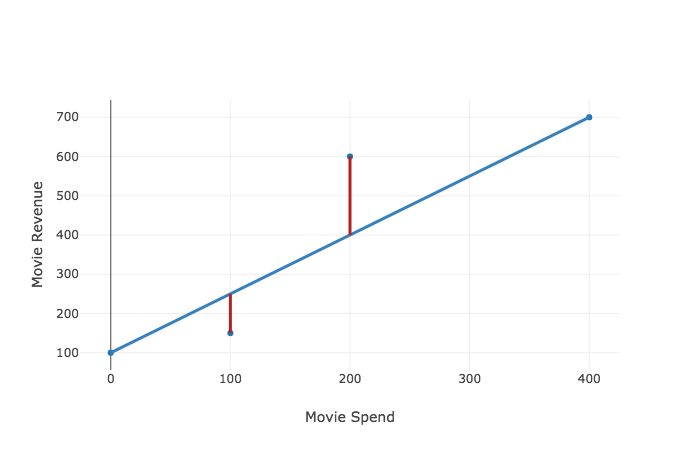![regression-scatter.png](./regression-scatter.png)

We quantify the accuracy of the regression line by squaring all of the errors (to eliminate negative values) and adding these squares together to get our residual sum of squares (RSS).  Armed with a number that describes the line's accuracy (or goodness of fit), we iteratively try new regression lines by adjusting our y-intercept value, $b$, or slope value, $m$, and then comparing these RSS values.  By finding the values $m$ and $b$ that minimize the RSS, we can find our "best fit line".  

In our cost function below, you can see the sequential values of $b$ and the related RSS values (given a constant value $m$).

In [14]:
import plotly
from plotly.offline import init_notebook_mode, iplot
# from graph import m_b_trace, trace_values, plot, build_layout --> write it again to avoid errors

def m_b_data(m, b, x_values):
    y_values = list(map(lambda x: m*x + b, x_values))
    return {'x': x_values, 'y': y_values}

def m_b_trace(m, b, x_values, mode = 'lines+markers', name = 'line function'):
    values = m_b_data(m, b, x_values)
    values.update({'mode': mode, 'name': name})
    return values

def trace_values(x_values, y_values, mode = 'markers', name="data", text = []):
    return {'x': x_values, 'y': y_values, 'mode': mode, 'name': name, 'text': text}

def plot(traces, layout = {}):
    if not isinstance(traces, list): raise TypeError('first argument must be a list.  Instead is', traces)
    plotly.offline.iplot({'data': traces, 'layout': layout})

def build_layout(x_range = None, y_range = None, options = {}):
    layout = {}
    if isinstance(x_range, list): layout.update({'xaxis': {'range': x_range}})
    if isinstance(y_range, list): layout.update({'yaxis': {'range': y_range}})
    layout.update(options)
    return layout

init_notebook_mode(connected=True)
b_values = list(range(70, 150, 10))
rss = [10852, 9690, 9128, 9166, 9804, 11042, 12880, 15318]

layout = build_layout(options = {'title': 'RSS with changes to y-intercept', 'xaxis': {'title': 'y-intercept value'}, 'yaxis': {'title': 'RSS'}})
cost_curve_trace = trace_values(b_values, rss, mode="lines+markers")
plot([cost_curve_trace], layout)

> The bottom of the blue curve displays the $b$ value that produces the lowest RSS.

### Things are not so simple

At this point, our problem of finding the minimum RSS may seem simple.  For example, why not simply try **all** of the different values for a y-intercept, and find the value where RSS is the lowest? 

So far, we have held one variable constant in order to experiment with the other. We need an approach that will continue to work as we change both of the variables in our regression line.  Altering the second variable makes things far more complicated.  Here is a quick look at our cost curve if we can change both our y-intercept and slope value:

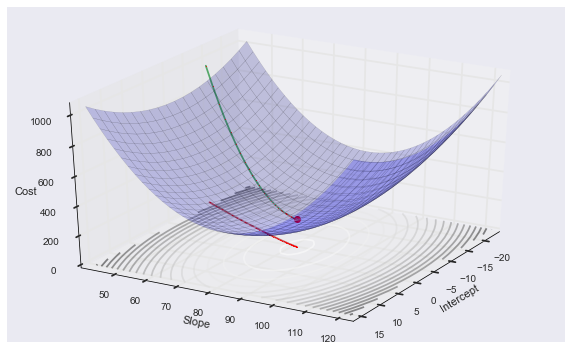

As we can see, exploring both variables, the slope and the y-intercept, requires plotting the second variable along the horizontal axis and turning our graph into a three-dimensional representation.  And in the future we'll be able to change more than just that.  

Furthermore, because we need to explore multiple variables in our regression lines, we are forced to rule out some approaches that are more computationally expensive, or simply not possible.

* We **cannot** simply use the derivative (more on that later) to find the minimum.  Using that approach will be impossible in many scenarios as our regression lines become more complicated.
* We **cannot** alter all of the variables of our regression line across all points and calculate the result.  It will take too much time, as we have more variables to alter. 

However, we are on the right track by altering our regression line and calculating the resulting RSS values.

Remember in the last lesson, we evaluated our regression line by changing our y-intercept by 10 to determine whether it produced a higher or lower RSS.  

| b        | residual sum of squared           | 
| ------------- |:-------------:| 
| 140| 24131
| 130      |21497| 
| 120      |19864 | 
| 110      |19230| 
|100 | 19597
|90 | 20963
|80 | 23330
|70| 26696

Rather than arbitrarily changing our variables, as we have done by decrementing the y-intercept by 10 in the example above, we need to move carefully down the cost curve to be certain that our changes are reducing the RSS.

### Our approach

We don't want to adjust the y-intercept value or another variable and hope that the RSS decreased.  Doing so is like trying to fly plane just by sitting down and pressing buttons.  

We want an approach that lets us be certain that we're moving in the right direction with every change.  Also, we want to know how much of a **change** to make to minimize RSS.  

> Let's call each of these changes a **step**, and the size of the change our **step size**. 

Our new task is to find step sizes that bring us to the best RSS quickly without overshooting the mark.

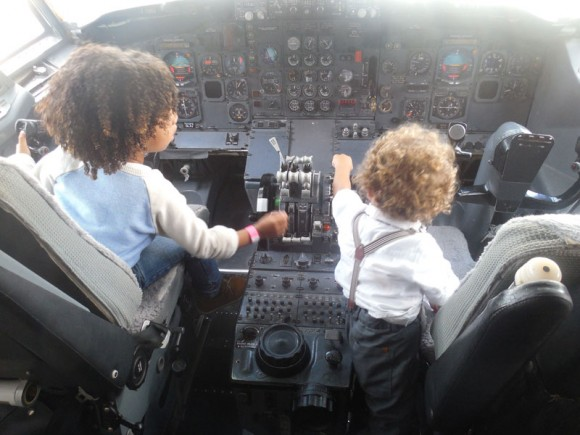

### The slope of the cost curve tells us our step size

Believe it or not, we can determine the proper step size just by looking at the slope of our cost function.

Imagine yourself standing on our cost curve like a skateboarder at the top of a halfpipe.  Even with your eyes closed, you could tell simply *by the way you tilted* whether to move forwards or backwards to approach the bottom of the cost curve.  

![](./skateboard.png)

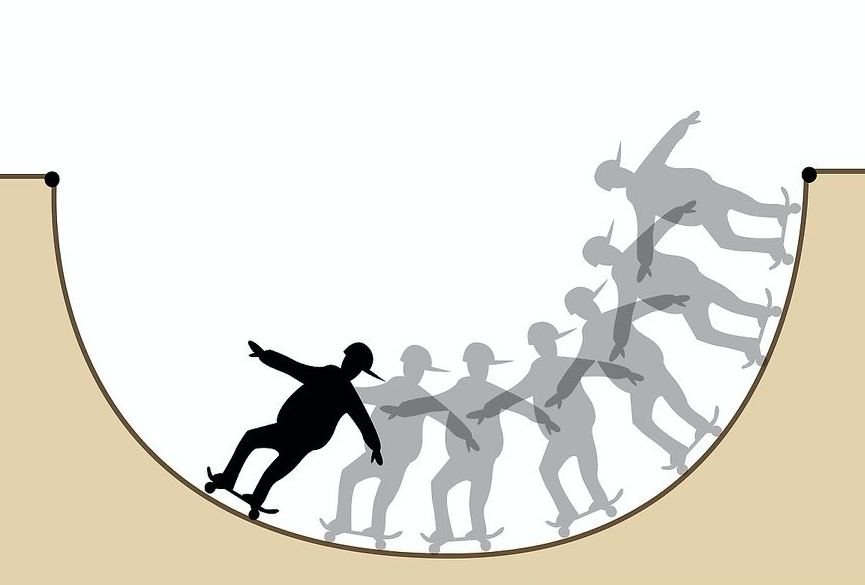

* If the slope tilts downwards, then we should walk forward to approach the minimum.  
* And if the slope tilts upwards, then we should point walk backwards to approach the minimum.  
* The steeper the tilt, the further away we are from our cost curve's minimum, so we should take a larger step.  

So by looking to the tilt of a cost curve at a given point, we can discover the direction of our next step and how large of step to take.  The beauty of this, is that as our regression lines become more complicated, we need not plot all of the values of our regression line.  We can see the next variation of the regression line to study simply by looking at the slope of the cost curve.

To demonstrate this, let's zoom in on our cost function and look at just one part of it.  Looking at our zoomed in cost function below, we can get a sense of the direction and magnitude of change required to alter our y-intercept in the next iteration.

In [15]:
import plotly
from plotly.offline import init_notebook_mode, iplot
# from graph import m_b_trace, trace_values, plot, build_layout

init_notebook_mode(connected=True)
layout = build_layout(options = {'title': 'RSS with changes to y-intercept', 'xaxis': {'title': 'y-intercept value'}, 'yaxis': {'title': 'RSS'}})
b_values = list(range(70, 150, 10)[:3])
rss = [10852, 9690, 9128, 9166, 9804, 11042, 12880, 15318][:3]
cost_curve_trace = trace_values(b_values, rss, mode="lines+markers")
plot([cost_curve_trace], layout)

### Stepping according to the slope

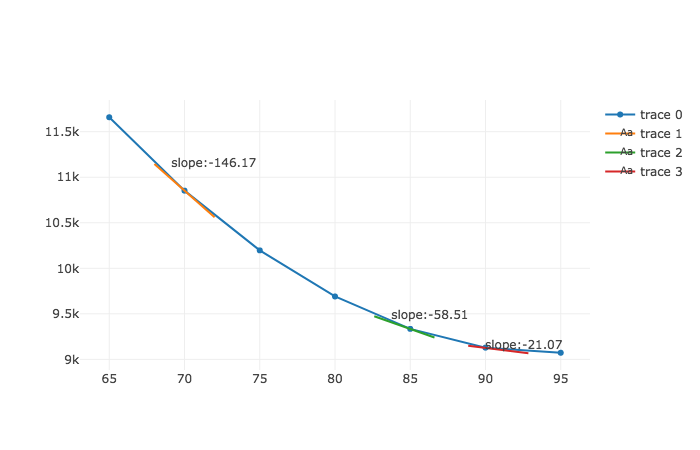

We can follow our technique with more precision by adding some numbers to our slope.  The slope of the curve at any given point is equal to the slope of the tangent line at that point.  By tangent line, we mean the line that just barely touches the curve at that point.  In the above graph, the orange, green, and red lines are tangent to our cost curve at the points where $b$ equals 70, 85, and 90, respectively.  The slopes of our tangent lines, and therefore the slopes of the cost curves at those points, are labeled above.  

Let's see how this works.

We use the following procedure to find the ideal $b$: 
1.  Randomly choose a value of $b$, and 
2.  Update $b$ with the formula $ b = (-.1) * slope_{b = i} + b_i$.

The formula above tells us which $b$ value to look at next. We start by choosing a random $b$ value that we can plug into our formula. We take the slope of the curve at that $b$ value and multiply it by $-.1$ then add it to our original $b$ value to produce our next $b$ value.

As we can surmise, the larger the slope, the larger the resulting step to the next $b$ value.

Here's an example.  We randomly choose a $b$ value of 70.  Then:

* $b_{t=0} = 70 $
* $b_{t=1} = (-.1) * -146.17  + 70 = 14.61 + 70 = 84.61 $
* $b_{t=2} = (-.1) * -58.51 + 85 = 5.851 + 85 = 90.85 $
* $b_{t=3} = (-.1) * -21.07 + 90.85 = 90.851 + 2.11 $

> Notice that we don't update our values of $b$ by just adding or subtracting the slope at that point.  The reason we multiply the slope by a fraction like .1 is so that we avoid the risk of overshooting the minimum.  This fraction is called the **learning rate**.  Here, the fraction is negative because we always want to move in the opposite direction of the slope. When the slope of the cost curve points downwards, we want to move to a higher y-intercept. Conversely, when we are on the right side of the curve and the slope is rising, we want to move backwards to a lower y-intercept.

This technique is pretty magical.  By looking at the tangent line at each point, we no longer are  changing our $b$ value and just hoping that it has the correct impact on our RSS.  This is because, for one, the slope of the tangent line points us in the right direction.  And as you can see above, our technique properly adjusts the amount to change the $b$ value by without even knowing the ideal $b$ value.  When our $b$ was far away from the ideal $b$ value, our formula increased $b$ by over 14.  By the third step, we were updating our $b$ value by only 2 because we were closer to the ideal slope for minimizing the RSS.  

### Summary

We started this section with saying that we wanted a technique to find a $b$ value that would minimize our RSS, given a value of $m$.  We did not want to simply try all of the values of $b$ as doing so would be inefficient.  Instead, we went with the approach of gradient descent, where we try variations of regression lines iteratively changing our $b$ variable and assessing our RSS to see if we are making progress.

In this lesson, we focused in on how to know which direction to alter a given variable, $m$ or $b$, as well as a technique for determining the size of the change to apply to one of our variables.  We used the line tangent to our cost curve at a given point to indicate the direction and size of the update to $b$.  The further away, the steeper the curve and thus the larger the step we would want to take.  Appropriately, our tangent line slope would have us take a larger step.  And the closer we are to the ideal $b$ value, the flatter the tangent line to the curve, and the smaller a step we would take. 